#### 1. Import Necessary Packages and Data

In [1]:
# GENERAL IMPORTS
import pandas as pd                                    #Used to read data
import csv                                             #Used for read data
import numpy as np                                     #Used to compute Root Mean Square Error
import matplotlib.pyplot as plt                        #Used to visualize data
import seaborn as sns                                  #Used to visualize data
from sklearn.model_selection import train_test_split   #Used to split the data into test and train sets 
from sklearn import metrics                            #Used to compute R^2, Mean Abs Error and Mean Square Error  
from sklearn.feature_selection import SelectKBest      #Used to compute the k scores and select features accordingly
from sklearn.feature_selection import f_regression     #Used to test the efficacy of each feature
from scipy.stats import gaussian_kde                   #Used to compute point density

# MODEL SPECIFIC IMPORTS
from sklearn.ensemble import RandomForestRegressor     #Used to fit and predict a Random Forest Regression Model

# DATA IMPORT
inputData = pd.read_excel(r'/Users/emilyknight/Documents/BMEN415 Final Project/Volumetric_features.xlsx', engine='openpyxl') #Import and Shuffle data

inputData.head() #Print complete dataset to console

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1


#### 2. Determine Data Correlation with the Output Variable

In [2]:
cor = inputData.corr() #Define correlation 

cor_target = abs(cor["Age"]) #Find correlation with age

relevant_features = cor_target[cor_target>0.6] #Determine relevant features (features with >60% correlation) 

relevant_features.to_frame #Turn the series of relevant features into a dataframe
relevant_features #Print relevant features to console

Left-Thalamus                        0.696598
3rd-Ventricle                        0.616427
Left-Hippocampus                     0.601390
Left-Amygdala                        0.612836
Left-choroid-plexus                  0.630961
Right-Thalamus                       0.677696
Right-Putamen                        0.620966
Right-Accumbens-area                 0.658007
lhCortexVol                          0.657288
rhCortexVol                          0.656251
CortexVol                            0.658139
SubCortGrayVol                       0.676319
TotalGrayVol                         0.668308
lh_inferiorparietal_thickness        0.629624
lh_parsopercularis_thickness         0.640510
lh_parstriangularis_thickness        0.635172
lh_postcentral_thickness             0.606031
lh_precentral_thickness              0.638825
lh_precuneus_thickness               0.634651
lh_rostralmiddlefrontal_thickness    0.648759
lh_superiorfrontal_thickness         0.695692
lh_superiortemporal_thickness     

#### 3. Create New Dataframe with Relevant Features

In [3]:
relevant_feature_names = relevant_features.index.values #Create tuple of relevant feature names
relevantData = inputData.filter(relevant_feature_names, axis=1) #Copy relevant features to a new dataframe
relevantData.head() #Print relevant dataset to console

,Left-Thalamus,3rd-Ventricle,Left-Hippocampus,Left-Amygdala,Left-choroid-plexus,Right-Thalamus,Right-Putamen,Right-Accumbens-area,lhCortexVol,rhCortexVol,...,rh_parstriangularis_thickness,rh_postcentral_thickness,rh_precentral_thickness,rh_precuneus_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_MeanThickness_thickness,Age
0,6855.5,2034.4,3443.0,1259.4,984.1,6420.7,4396.6,306.9,211232.5198,208279.9625,...,2.404,1.872,2.445,2.328,2.147,2.597,2.648,2.408,2.33635,85
1,6835.1,1927.1,3479.4,1298.6,966.6,6981.2,4504.1,336.4,213515.0486,210166.6207,...,2.431,1.937,2.503,2.343,2.196,2.597,2.660,2.417,2.34202,85
2,7566.0,2064.7,3385.2,1279.6,1020.3,7088.3,4461.0,306.4,212234.1905,208749.3851,...,2.455,1.904,2.405,2.310,2.176,2.607,2.597,2.374,2.31982,86
3,8004.6,2017.7,3311.5,1211.5,901.9,7687.1,3979.8,271.1,203358.7451,203130.7953,...,2.347,1.866,2.375,2.257,2.144,2.507,2.604,2.366,2.29215,87
4,6677.4,2251.8,3220.8,1244.8,1089.0,7153.5,4353.2,320.8,207834.7973,204297.4942,...,2.318,1.891,2.419,2.351,2.079,2.478,2.597,2.381,2.30397,89


#### 4. Select and Split Input and Output Vectors

In [4]:
# Select Input Vector, X, and Output Vector, y
X = relevantData.drop(columns= ['Age']) #Input vector is the brain volume
y = relevantData['Age'] #Output data is the age

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #Split vectors, 20% will be used for testing 

#### 5. Graph Feature Scores for the Input and Output Vectors

Feature 0: 3215.076452
Feature 1: 2080.699837
Feature 2: 1948.179846
Feature 3: 1995.041691
Feature 4: 2243.902638
Feature 5: 2890.208710
Feature 6: 2053.507062
Feature 7: 2638.132910
Feature 8: 2546.771745
Feature 9: 2520.322921
Feature 10: 2550.317179
Feature 11: 2853.249168
Feature 12: 2709.029819
Feature 13: 2182.482924
Feature 14: 2295.834487
Feature 15: 2283.940957
Feature 16: 1895.809647
Feature 17: 2295.719716
Feature 18: 2209.677594
Feature 19: 2356.199297
Feature 20: 3179.099384
Feature 21: 2801.712056
Feature 22: 2493.441453
Feature 23: 3250.873862
Feature 24: 2364.689881
Feature 25: 2487.982638
Feature 26: 3014.300372
Feature 27: 1881.641704
Feature 28: 2095.916551
Feature 29: 2162.387653
Feature 30: 2279.549241
Feature 31: 2800.363375
Feature 32: 2939.976075
Feature 33: 2592.297077
Feature 34: 3306.935660


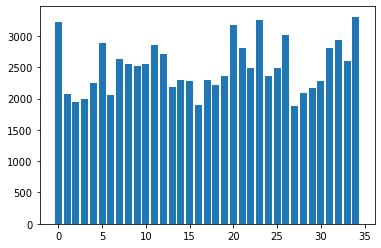

In [5]:
def select_features(X_train, y_train, X_test): #Function used to select applicable features
    fs = SelectKBest(score_func=f_regression, k='all') #Configure to Select All Features
    fs.fit(X_train, y_train)  #Learn the relationship from training data
    X_train_fs = fs.transform(X_train) #Transform the input training data
    X_test_fs = fs.transform(X_test) #Transform the input test data
    return X_train_fs, X_test_fs, fs
 
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test) #Select applicable features

for i in range(len(fs.scores_)): #For each of the feature scores
    print('Feature %d: %f' % (i, fs.scores_[i])) #Print the score to the console

    
plt.bar([i for i in range(len(fs.scores_))], fs.scores_) #Plot the scores where a longer bar represents a more applicable feature
plt.show()

#### 6. Determine the Best Features

In [6]:
k = 10    #Obtaining the 10 best features

indices = np.argsort(fs.scores_)[::-1] #Sort the features
print(indices) #Print the features from best to worst

relevantData.corr()#Print the feature correlation

[34 23  0 20 26 32  5 11 21 31 12  7 33 10  8  9 22 25 24 19 14 17 15 30
  4 18 13 29 28  1  6  3  2 16 27]


,Left-Thalamus,3rd-Ventricle,Left-Hippocampus,Left-Amygdala,Left-choroid-plexus,Right-Thalamus,Right-Putamen,Right-Accumbens-area,lhCortexVol,rhCortexVol,...,rh_parstriangularis_thickness,rh_postcentral_thickness,rh_precentral_thickness,rh_precuneus_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_MeanThickness_thickness,Age
Left-Thalamus,1.000000,-0.406120,0.742072,0.677330,-0.438474,0.909240,0.672992,0.560422,0.739606,0.736062,...,0.498658,0.470322,0.421876,0.474832,0.460434,0.470515,0.548083,0.508498,0.520636,-0.696598
3rd-Ventricle,-0.406120,1.000000,-0.331450,-0.336555,0.710784,-0.358931,-0.282654,-0.433445,-0.251124,-0.249049,...,-0.510964,-0.423329,-0.452654,-0.431980,-0.503078,-0.518317,-0.496620,-0.493954,-0.507112,0.616427
Left-Hippocampus,0.742072,-0.331450,1.000000,0.782702,-0.368454,0.734812,0.636997,0.593081,0.697834,0.696184,...,0.437268,0.463632,0.417402,0.449612,0.438606,0.430650,0.561939,0.471767,0.509885,-0.601390
Left-Amygdala,0.677330,-0.336555,0.782702,1.000000,-0.354736,0.711494,0.644764,0.611783,0.695496,0.695223,...,0.451708,0.474580,0.458792,0.485099,0.450822,0.457801,0.556465,0.496701,0.535964,-0.612836
Left-choroid-plexus,-0.438474,0.710784,-0.368454,-0.354736,1.000000,-0.380079,-0.312257,-0.424564,-0.261279,-0.259709,...,-0.492985,-0.437481,-0.445470,-0.468587,-0.478938,-0.516429,-0.503019,-0.503942,-0.514694,0.630961
Right-Thalamus,0.909240,-0.358931,0.734812,0.711494,-0.380079,1.000000,0.673963,0.548648,0.766735,0.772401,...,0.505537,0.522971,0.475090,0.532949,0.496320,0.499253,0.576496,0.550517,0.579179,-0.677696
Right-Putamen,0.672992,-0.282654,0.636997,0.644764,-0.312257,0.673963,1.000000,0.668210,0.719127,0.718742,...,0.466129,0.444167,0.453377,0.478762,0.426866,0.463423,0.503343,0.482041,0.523153,-0.620966
Right-Accumbens-area,0.560422,-0.433445,0.593081,0.611783,-0.424564,0.548648,0.668210,1.000000,0.629430,0.633977,...,0.478364,0.448640,0.477793,0.465009,0.431929,0.427612,0.497467,0.486130,0.519841,-0.658007
lhCortexVol,0.739606,-0.251124,0.697834,0.695496,-0.261279,0.766735,0.719127,0.629430,1.000000,0.991674,...,0.561880,0.592039,0.561944,0.614467,0.525942,0.531112,0.610499,0.606066,0.659920,-0.657288
rhCortexVol,0.736062,-0.249049,0.696184,0.695223,-0.259709,0.772401,0.718742,0.633977,0.991674,1.000000,...,0.564357,0.596521,0.566115,0.614431,0.530821,0.528925,0.618048,0.616361,0.667252,-0.656251


#### 7. Instantiate and Fit Models

In [7]:
regr_rfr = RandomForestRegressor(max_depth=2, random_state=0) #Random Forest Model with a Max Depth of 2

regr_rfr.fit(X_train, y_train) #Fit the Model given a Max Depth of 2

RandomForestRegressor(max_depth=2, random_state=0)

#### 8. Test and Quantify Model Performance

In [8]:
regr_rfr_predictions = regr_rfr.predict(X_test) #Create predictions based on the Random Forest Model with unseen test data 

#Compare the predictions to the known test values
print('\033[1m' + 'Nearest Neighbours' + '\033[0m')
print('r^2 Value:', metrics.r2_score(y_test, regr_rfr_predictions))
print('Mean Absolute Error (Years):', metrics.mean_absolute_error(y_test, regr_rfr_predictions))
print('Mean Square Error:', metrics.mean_squared_error(y_test, regr_rfr_predictions))
print('Root Mean Sqaure Error (Years):', np.sqrt(metrics.mean_squared_error(y_test, regr_rfr_predictions)))

Nearest Neighbours
r^2 Value: 0.6912693119855733
Mean Absolute Error (Years): 8.85073127842493
Mean Square Error: 123.62554665307226
Root Mean Sqaure Error (Years): 11.118702561588393


#### 9. Visualize Data

/Users/emilyknight/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


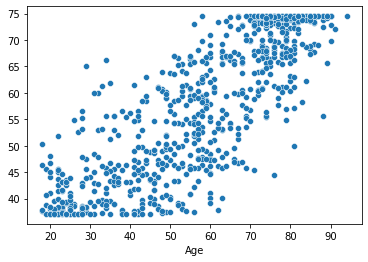

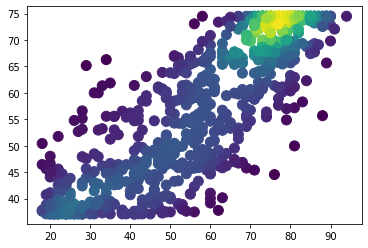

In [9]:
sns.scatterplot(y_test, regr_rfr_predictions) #Create a scatter plot of the data 

xy = np.vstack([y_test, regr_rfr_predictions]) #Stack arrays
z = gaussian_kde(xy)(xy) #Calculate point density estimates using Gaussian kernels.

fig,ax = plt.subplots()
ax.scatter(y_test, regr_rfr_predictions, c=z, s=100) #Create a density scatter plot of the data 
plt.show()